In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv("fingerprints_119697.txt", sep=" ", names=['id', 'fingerprint'], index_col=0)

In [3]:
def bin_format(number, num_of_bits=3736):
    return list(map(int, list(bin(int(number, 16))[2:].zfill(num_of_bits))))

In [4]:
df['fingerprint'] = df['fingerprint'].apply(bin_format)

In [78]:
split_df = pd.DataFrame(df['fingerprint'].tolist())

In [81]:
split_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,3726,3727,3728,3729,3730,3731,3732,3733,3734,3735
count,119697,119697,119697,119697,119697,119697,119697,119697,119697,119697,...,119697,119697,119697,119697,119697,119697,119697,119697,119697,119697
unique,2,2,2,2,2,2,2,2,1,2,...,2,2,2,2,2,2,2,2,2,2
top,0,0,0,1,1,1,1,1,0,0,...,1,1,0,1,1,0,0,1,1,1
freq,119656,102785,79377,74634,106718,79837,104658,115492,119697,112935,...,118060,96319,98512,94248,65512,84357,109417,72215,83925,117782


In [49]:
# df_5000 = df.sample(n=50000)
df_5000 = df

In [11]:
df_5000.fingerprint

id
26192414    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
26334003    [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, ...
26086971    [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
26338962    [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
26009498    [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
                                  ...                        
26429681    [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, ...
26009633    [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
26347948    [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
26346663    [0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
26070589    [0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
Name: fingerprint, Length: 5000, dtype: object

In [10]:
from sklearn.decomposition import PCA

In [50]:
X = df_5000.fingerprint.to_list()

In [63]:
pca = PCA(n_components=1000)
pca.fit(X)

PCA(n_components=1000)

In [64]:
X_pca = pca.fit_transform(X)

In [23]:
from sklearn.cluster import KMeans

In [61]:
sse = []
ks = range(1, 100, 10)
for k in ks:
    print(k)
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X_pca)
    sse.append(np.sqrt(kmeans.inertia_))

1
11
21
31
41
51
61
71
81
91


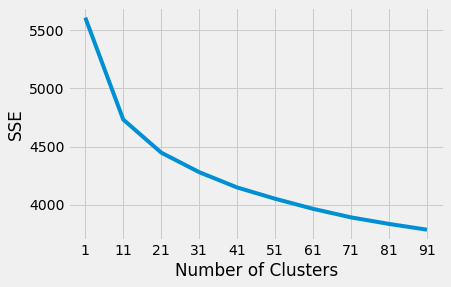

In [62]:
plt.style.use("fivethirtyeight")
plt.plot(ks, sse)
plt.xticks(ks)
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [38]:
from sklearn.neighbors import KDTree

In [65]:
tree = KDTree(X_pca, leaf_size=2)              

In [66]:
dist, ind = tree.query(X_pca[:1], k=3)   

In [67]:
dist, ind

(array([[ 0.        , 14.72393636, 14.89325289]]),
 array([[    0,  7208, 37533]]))

In [60]:
len(X_pca)

119697

In [68]:
for i in ind:
    print(df_5000.iloc[i])

                                                fingerprint
id                                                         
26000020  [0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
26013936  [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
26187389  [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
